# 1. Predict whether someone is at risk of heart disease using Naive bayes Algorithm

In [114]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2.Load the data

In [163]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [150]:
df.info() #our data has no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [116]:
# data inspection for those prone to heart disease
class_1=df[df['target']==1] # target 1, represents those at risk
class_1.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [117]:
# data inspection for those not
class_0=df[df['target']==0] # target 1, represents those at risk
class_0.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [118]:
# check the dimension of the dataset
df.shape

(303, 14)

In [119]:
# check the target distribution in the dataset
df['target'].value_counts() # in our data we have 165 at risk of heart disease 
                            #Against 138

1    165
0    138
Name: target, dtype: int64

C:\Users\IBRAEKOSSO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


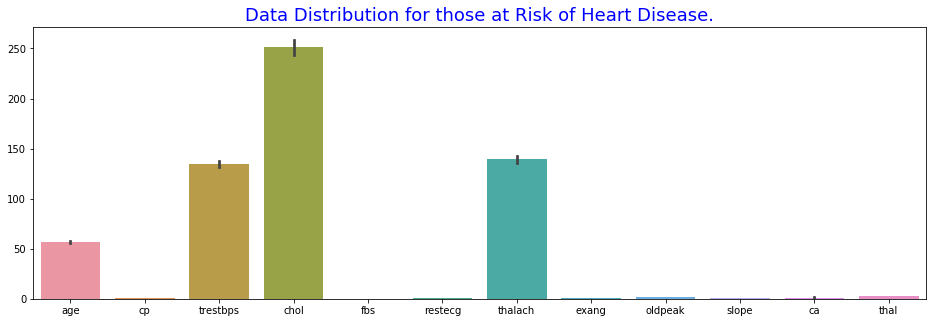

In [120]:
# visualizing data distribution on bar plot
plt.figure(figsize=(16,5))
sns.barplot(data=class_0.drop(['target','sex'], axis=1))
plt.title("Data Distribution for those at Risk of Heart Disease.", color='Blue', fontsize=18)
plt.show()

In [121]:
#separate the features and target variable
x = df.drop('target', axis=1) # features
y = df['target'].values # target variable

# 3.Create train and test set

In [122]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

# 4.Implement gaussian naive bayes

In [123]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes

GaussianNB(priors=None)

In [124]:
# train the model and make predictions
naive_bayes.fit(x_train, y_train)
predictions = naive_bayes.predict(x_test)
predictions

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [125]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions) # Accuracy = Correct predictions / Total predictions
print('Accuracy Score: ', score)

Accuracy Score:  0.8524590163934426


# generate confusion matrix comparing the predictions with the actual results

In [126]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, predictions)
cm

array([[21,  6],
       [ 3, 31]], dtype=int64)

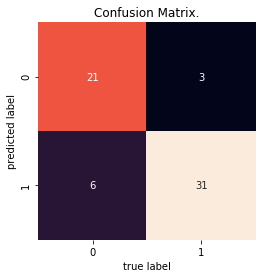

In [153]:
# visualization of the confusion matrix
sns.heatmap(cm.T, square=True, annot=True, cbar=False)
plt.title("Confusion Matrix.")
plt.xlabel('true label')
plt.ylabel('predicted label');

In [128]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.88      0.78      0.82        27
          1       0.84      0.91      0.87        34

avg / total       0.85      0.85      0.85        61



In [167]:
# Plot the results
#sns.FacetGrid(df, hue="target", size=7) .map(plt.scatter,'trestbps', "age", )  .add_legend()
#plt.title('Scatter plot')
#plt.show()